In [1]:
import pandas as pd
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib
<h1>Load CSV file into memory</h1>

In [2]:
df = pd.read_csv('UberRawData.csv')

In [3]:
df.head(4)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512


In [4]:
df.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
df.head(6)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512


In [6]:
df.head(7)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512


Convert string Date/Time into timestamp using map() and to_datetime

In [30]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

In [31]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


Create function to return day of month

In [32]:
def get_dom(date_time):
    return date_time.day
df['Day of month'] = df['Date/Time'].map(get_dom)

In [33]:
df.head()

,Date/Time,Lat,Lon,Base,Day of month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [34]:
def get_weekday(date_time):
    return date_time.weekday()
df['Weekday'] = df['Date/Time'].map(get_weekday)

def get_hour(date_time):
    return date_time.hour
df['Hour'] = df['Date/Time'].map(get_hour)

In [35]:
df.iloc[3000:3005]

,Date/Time,Lat,Lon,Base,Day of month,Weekday,Hour
3000,2014-04-03 15:59:00,40.7621,-73.9734,B02512,3,3,15
3001,2014-04-03 15:59:00,40.7727,-73.8857,B02512,3,3,15
3002,2014-04-03 15:59:00,40.7288,-73.9804,B02512,3,3,15
3003,2014-04-03 15:59:00,40.7516,-74.0057,B02512,3,3,15
3004,2014-04-03 16:01:00,40.7502,-74.0038,B02512,3,3,16


<h1>Analysic</h1>

<AxesSubplot: >

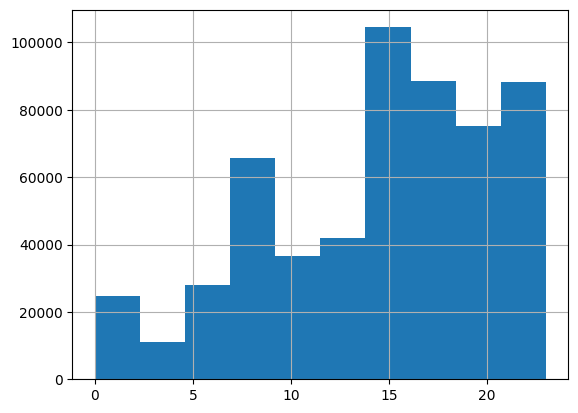

In [36]:
df.Hour.hist()

<AxesSubplot: >

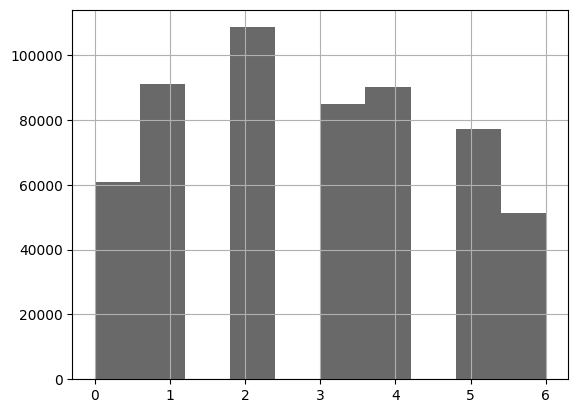

In [37]:
df['Weekday'].hist(color = 'dimgray')

Text(0.5, 1.0, 'Frequency by Day of month Uber')

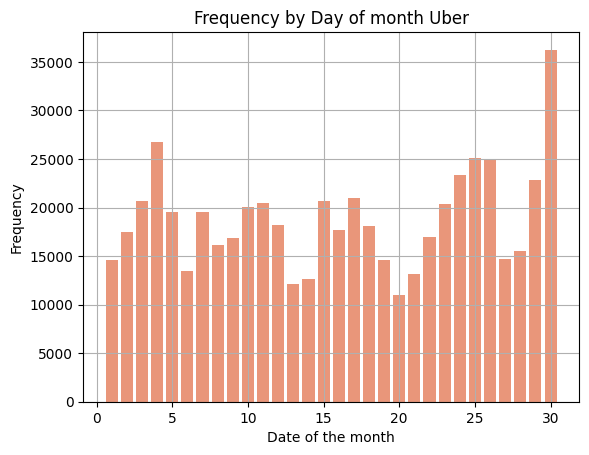

In [38]:
from matplotlib import pyplot as plt
df['Day of month'].hist(bins = 30, rwidth = .8, range = (0.5, 30.5), color = 'darksalmon')
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by Day of month Uber')

In [39]:
for k, rows in df.groupby('Week day'):
    print(k, len(rows))

KeyError: 'Week day'

Similar way using function

In [40]:
def count_rows(rows):
    return len(rows)

by_date = df.groupby('Day of month').apply(count_rows)

In [41]:
by_date

Day of month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

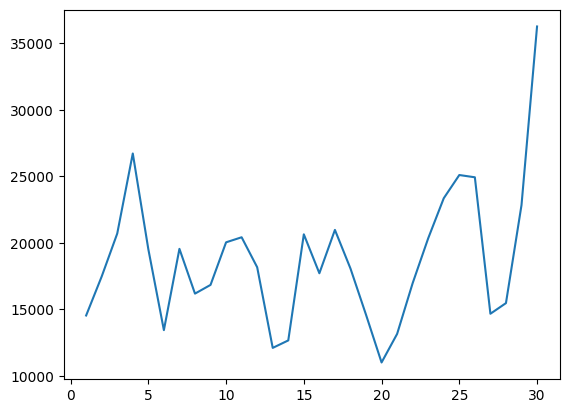

In [42]:
plt.plot(by_date)

Text(0.5, 1.0, 'Frequency by Day of month Uber')

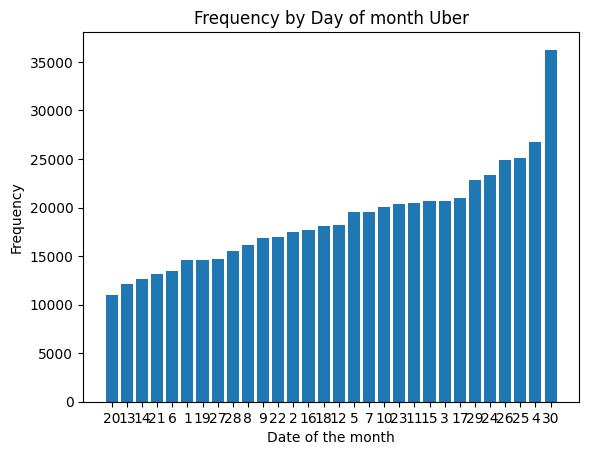

In [43]:
by_date_sorted = by_date.sort_values()
plt.xticks(range(1, 31), by_date_sorted.index)
plt.bar(range(1, 31), by_date_sorted)
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by Day of month Uber')

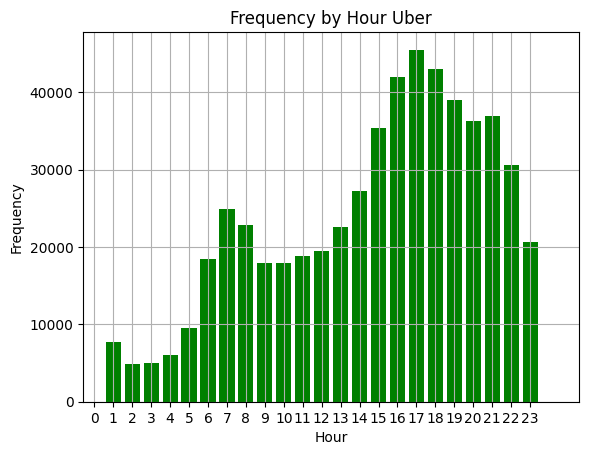

In [44]:
df['Hour'].hist(bins = 24, rwidth = .8, range = (.5,24.5), color = 'green')
plt.xticks(range(0,24))
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency by Hour Uber');

In [ ]:
df['Week day'].hist(bins = 7, rwidth = .8, range = (-.5,6.5), color = 'red', alpha = .2)
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Week day')
plt.ylabel('Frequency')
plt.title('Frequency by Week day Uber')

In [ ]:
df.groupby(['Hour', 'Week day']).apply(count_rows).unstack()

In [ ]:
by_hour_weekday = df.groupby(['Hour', 'Week day']).apply(count_rows).unstack()
plt.plot(by_hour_weekday)
plt.legend(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [ ]:
df.groupby(['Week day', 'Hour']).apply(count_rows).unstack()

<h1>Change Value in weekday</h1>

In [ ]:
week_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    df.loc[df['Week day'] == i, 'Week day'] = week_day[i]

In [ ]:
df.iloc[3000:3005]

In [ ]:
df.groupby(['Week day', 'Hour']).apply(count_rows).unstack()

In [ ]:
by_week_hour = df.groupby(['Week day', 'Hour']).apply(count_rows).unstack()

<h1>Reindex after changing name of index</h1>

In [ ]:
by_week_hour = by_week_hour.reindex(week_day)
by_week_hour

<h1>Seaborn applied to visualize data</h1>

In [ ]:
sb.heatmap(by_week_hour, cmap = "YlGnBu")

<h1>By Lat and Lon</h1>

In [ ]:
df['Lat'].hist(bins = 100, range = (40.51, 40.99))

In [ ]:
df['Lon'].hist(bins = 100, range = (-74.1, -73.9))

In [ ]:
df['Lon'].hist(bins = 100, range = (-74.1,-73.9), color = 'lightblue', alpha = 0.7, label = 'longtitude')
plt.legend()
plt.twiny()
df['Lat'].hist(bins = 100, range = (40.51,40.99), color = 'darksalmon', alpha = 0.7, label = 'lattitude')
plt.legend(loc = 'upper left')

In [ ]:
plt.plot(df['Lat'])

In [ ]:
plt.plot(df['Lat'])
plt.xlim(0,150)

In [ ]:
plt.plot(df['Lat'], '.', ms = 5)
plt.xlim(0,100)

In [ ]:
plt.plot(df['Lat'],'x', ms = 5, color = 'darksalmon')
plt.xlim(0,50)

In [ ]:
plt.plot(df['Lon'],df['Lat'], color = 'darksalmon')

In [ ]:
plt.plot(df['Lon'],df['Lat'], '.', ms = 1, color = 'blue', alpha = 0.5)

In [ ]:
plt.figure(figsize = [15 ,10])
plt.plot(df['Lon'], df['Lat'], '.', ms = 1, color = 'darksalmon', alpha = 0.5)
plt.xlim(-74.2,-73.7)
plt.ylim(40.7,41)